# Cruzamento de Médias

A ideia desse projeto é criar um algorítmo que traça uma estratégia de cruzamento de médias moveis de uma determinada ação para indicar pontos de compra e de venda.

Após criar esse algorítmo a ideia é verificar o percentual de acertividade dessa estratégia dentro de vários papéis e utilizando vários parâmetros até encontrar a maior margem de acertividade.

https://www.youtube.com/watch?v=QhzAEThs8wE

# Instalação da Biblioteca

In [2]:
pip install yfinance --upgrade --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 213.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 228.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 237.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 212.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=852612 sha256=25072a6b1634e79ea2b2abc1059e00d862a7531569bca99543aac113cab02a08
  Stored in directory: /tmp/pip-ephem-wheel-cache-c1puo8eg/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from datetime import datetime
import yfinance as yf

# Definindo Dataframes

**Função que baixa os dados financeiros do Yahoo Finance e armazena por categoria em cada um dos dicionários descritos na célula.**

**Parâmetros:**
- tickers_dict: dict, chave = nome e valor = ticker.
- start_date: str, data de início no formato 'YYYY-MM-DD'.
- end_date: str, data de fim no formato 'YYYY-MM-DD'.


In [4]:
stocks_dfs = {}
commodities_dfs = {}
coins_dfs = {}

def create_dataframe(tickers_dict, start_date, end_date):

    for name, ticker in tickers_dict.items():
        try:
            df = yf.download(ticker, start=start_date, end=end_date)

            if not df.empty:
                if ticker.endswith('.SA'):
                    stocks_dfs[name] = df

                elif ticker.endswith('=F'):
                    commodities_dfs[name] = df

                else:
                    coins_dfs[name] = df
        except Exception as e:
            print(f'Erro ao baixar dados para: {name}, Erro: {e}')


## Ações

In [5]:
stocks = {
    "Ambev": "ABEV3.SA", "Aliansce Sonae": "ALOS3.SA", "Americanas": "AMER3.SA", "Banco do Brasil": "BBAS3.SA", "Bradesco": "BBDC4.SA", "BB Seguridade": "BBSE3.SA", "Casas Bahia": "BHIA3.SA", "Bradespar": "BRAP4.SA", "BRF": "BRFS3.SA", "Braskem": "BRKM5.SA", "B3": "B3SA3.SA", "CCR": "CCRO3.SA", "Cielo": "CIEL3.SA", "CEMIG": "CMIG4.SA", "Cogna Educação": "COGN3.SA", "Cosan": "CSAN3.SA", "CSN": "CSNA3.SA", "CVC": "CVCB3.SA", "Cyrela": "CYRE3.SA", "Ecorodovias": "ECOR3.SA", "Engie Brasil": "EGIE3.SA", "Eletrobras": "ELET3.SA", "Embraer": "EMBR3.SA", "Equatorial Energia": "EQTL3.SA", "Gerdau": "GGBR4.SA", "Metalúrgica Gerdau": "GOAU4.SA", "Hypera Pharma": "HYPE3.SA", "IRB Brasil RE": "IRBR3.SA", "Itaúsa": "ITSA4.SA", "Itaú Unibanco": "ITUB4.SA", "JBS": "JBSS3.SA", "Lojas Renner": "LREN3.SA", "Magazine Luiza": "MGLU3.SA", "Natura": "NTCO3.SA", "Petrobras": "PETR4.SA", "Petz": "PETZ3.SA", "PetroRio": "PRIO3.SA", "Qualicorp": "QUAL3.SA", "Raia Drogasil": "RADL3.SA", "Rumo": "RAIL3.SA", "Raízen": "RAIZ4.SA", "Rede D'Or São Luiz": "RDOR3.SA", "Localiza": "RENT3.SA", "3R Petroleum": "RRRP3.SA", "Sabesp": "SBSP3.SA", "Suzano": "SUZB3.SA", "TAESA": "TAEE11.SA", "Ultrapar": "UGPA3.SA", "Usiminas": "USIM5.SA", "Vale": "VALE3.SA", "Telefônica Brasil": "VIVT3.SA", "WEG": "WEGE3.SA", "XP Inc.": "XPBR31.SA", "Yduqs": "YDUQ3.SA"
}

create_dataframe(stocks, '2024-01-01', None)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

## Commodities

In [6]:
commodities = {
    "Petróleo Bruto WTI": "CL=F", "Petróleo Bruto Brent": "BZ=F",
    "Ouro": "GC=F", "Prata": "SI=F",
    "Gás Natural": "NG=F", "Milho": "ZC=F",
    "Soja": "ZS=F", "Trigo": "ZW=F"
}

create_dataframe(commodities, '2022-01-01', None)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Moedas

In [7]:
coins = {
    'Dolar': 'USDBRL=X',
    'Euro': 'EURBRL=X'
}

create_dataframe(coins, '2023-10-01', None)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Funções para a estratégia de Cruzamento de Médias

**Função que cria duas médias moveis exponenciais e insere no dataframe utilizado.**

**Parâmetros:**

- stock: df, lembrando que para puxar a ação deve-se usar o formato "stocks_dfs[ 'Nome da Ação' ]"
- mme_1: int, valor do periodo da primeira média
- mme_2: int, valor do periodo da segunda média

Obs: O mme_1 deve ser menor do que o mme_2

In [8]:
def insert_mme(stock, mme_1, mme_2):

    stock['MME_1'] = stock['Close'].ewm(span=mme_1, adjust=False).mean()
    stock['MME_2'] = stock['Close'].ewm(span=mme_2, adjust=False).mean()

**Essa função cria as colunas de compra e venda, cada coluna sempre terá valor _nan_ exceto quando houver o cruzamento das médias. Nesse caso a coluna que indica a operação a ser feita receberá o valor de fechamento da ação**

**Parâmetros:**    
- stock: df, lembrando que para puxar a ação deve-se usar o formato "stocks_dfs[ 'Nome da Ação' ]"

In [9]:
def moving_average_crossover(stock):
    buy = []
    sell = []
    flag = 0

    for i in range(0, len(stock)):

        if stock['MME_1'][i] > stock['MME_2'][i]:
            if flag != 1:
                buy.append(round(stock['Close'][i], 2))
                sell.append(np.nan)
                flag = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan) 

        elif stock['MME_1'][i] < stock['MME_2'][i]:
            if flag != 2:
                buy.append(np.nan)
                sell.append(round(stock['Close'][i], 2))
                flag = 2
            else:
                buy.append(np.nan)
                sell.append(np.nan)

        else:
            buy.append(np.nan)
            sell.append(np.nan) 
    
    stock['Buy'] = buy
    stock['Sell'] = sell


**Função para 'plotar' o gráfico de linhas contendo a análise do cruzamento de médias**       

**Parâmetros:**
- stock: df, lembrando que para puxar a ação deve-se usar o formato "stocks_dfs[ 'Nome da Ação' ]"

In [1]:
def plot_line_graph(df):
    plt.figure(figsize=(18,6))
    plt.plot(df['Close'], label='Ação', color='blue')
    plt.plot(df['MME_1'], label='MME_1', color='green', linestyle='--', alpha=.6)
    plt.plot(df['MME_2'], label='MME_2', color='red', linestyle='--', alpha=.6)
    plt.plot(df['Buy'], label='Compra', marker='^', color='green', markersize=12)
    plt.plot(df['Sell'], label='Venda', marker='v', color='red', markersize=12)
    plt.xticks(rotation=30, ha='right')
    plt.title(f'Análise de Cruzamento de Médias', fontsize=18)
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    plt.legend()
    plt.show() 

# Definindo Ação e parâmetros para análise

In [10]:
stocks_dfs.keys()

dict_keys(['Ambev', 'Aliansce Sonae', 'Americanas', 'Banco do Brasil', 'Bradesco', 'BB Seguridade', 'Casas Bahia', 'Bradespar', 'BRF', 'Braskem', 'B3', 'CCR', 'Cielo', 'CEMIG', 'Cogna Educação', 'Cosan', 'CSN', 'CVC', 'Cyrela', 'Ecorodovias', 'Engie Brasil', 'Eletrobras', 'Embraer', 'Equatorial Energia', 'Gerdau', 'Metalúrgica Gerdau', 'Hypera Pharma', 'IRB Brasil RE', 'Itaúsa', 'Itaú Unibanco', 'JBS', 'Lojas Renner', 'Magazine Luiza', 'Natura', 'Petrobras', 'Petz', 'PetroRio', 'Qualicorp', 'Raia Drogasil', 'Rumo', 'Raízen', "Rede D'Or São Luiz", 'Localiza', '3R Petroleum', 'Sabesp', 'Suzano', 'TAESA', 'Ultrapar', 'Usiminas', 'Vale', 'Telefônica Brasil', 'WEG', 'XP Inc.', 'Yduqs'])

/tmp/ipykernel_17160/445185395.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock['MME_1'][i] > stock['MME_2'][i]:
/tmp/ipykernel_17160/445185395.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif stock['MME_1'][i] < stock['MME_2'][i]:
/tmp/ipykernel_17160/445185395.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy.append(round(stock['Close'][i], 2))
/tmp/ipykernel_17160/445185395.py:20: FutureWarning: Series

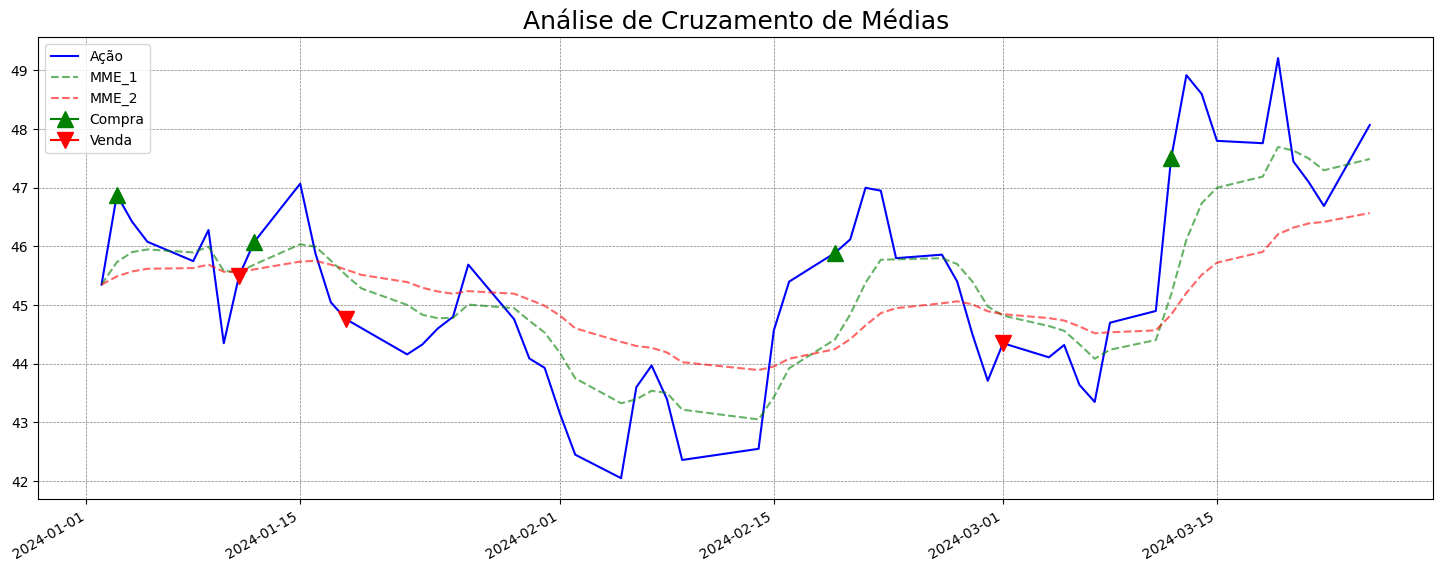

In [11]:
insert_mme(stocks_dfs['PetroRio'], 7, 21)
moving_average_crossover(stocks_dfs['PetroRio'])
plot_line_graph(stocks_dfs['PetroRio'])